# APS360 Project

The purpose of our model is to detect emotions (Positive, Neutral, Negative) from the given sentence, mainly from Twitter.

## 1. Data Preprocessing:



From the searched dataset, choose the most appropriate sets (e.g. no any missing values, or anything that will misleading the model). First, list the dataset you chose at here. Then, combine the records into one csv file, with the appropriate format. After this, split the data into train/val/test sets with appropriate percentages.

We choose to divide the emotions into mainly three categories: Positive, Negative, Neutral.

1.1 Load the data

Import needed libraries：

In [ ]:
import pandas as pd
import csv
import numpy as np
import random
import torch
import torch.utils.data
import matplotlib.pyplot as plt

Mount at google drive：

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


get the dataframe：

In [ ]:
#csv_path='/content/drive/MyDrive/Untitled Folder 1/Copy of project.csv'  # path 0 (Zhijian)
#csv_path = '/content/drive/MyDrive/APS360_project/project.csv'  # path 1 (Lynne)
csv_path = '/content/drive/MyDrive/project.csv'  # path 2 (Yixuan)
df=pd.read_csv(csv_path)

In [ ]:
# Filter rows based on valid values in the target column
valid_values = [-1, 0, 1]
df = df[df['label'].isin(valid_values)]

In [ ]:
len(df)

1825493

Visualize part of the data：

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df[1825489:]

,label,sentence
1825489,-1.0,dear rss terrorist payal gawar what about modi...
1825490,0.0,did you cover her interaction forum where she ...
1825491,0.0,there big project came into india modi dream p...
1825492,1.0,have you ever listen about like gurukul where ...


Have been combine the needed data into one file.

## 2. Data Transformation:

2.1 Preprocessing the sentence

Load all neeed packages and libraries:

In [ ]:
# import all needed libraries in section 2.1

# packages needed by tokenization
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# packages needed by remove punctuations
import string
# packages needed by co-occurance calc
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenize the sentence by white-space tokenization:

In [ ]:
##### SAMPLE CODE #####
sentence = "Tokenizing a sentence is an important step."
tokens = sentence.split()

In [ ]:
##### OUR CODE #####
df['sentence'] = df['sentence'].astype(str)  # Convert 'sentence' column to string
df['tokenized_sentences'] = df['sentence'].apply(lambda x: word_tokenize(x))  # New column 'tokenized_sentences' containing tokenized sentences
subdf = df[["label", "tokenized_sentences"]]  # extract the labels and tokenized sentences into a new dataframe, subdf
subdf[:3]  # visualize first three lines of subdf dataframe

,label,tokenized_sentences
0,1.0,"[im, getting, on, borderlands, and, i, will, m..."
1,1.0,"[I, am, coming, to, the, borders, and, I, will..."
2,1.0,"[im, getting, on, borderlands, and, i, will, k..."


Remove the punctuations by manual punctuation removal:

In [ ]:
##### SAMPLE CODE #####
tokens = ['Tokenizing', 'a', 'sentence', 'is', 'an', 'important', 'step.']
# Remove punctuation from tokens
tokens_without_punct = [token.strip(string.punctuation) for token in tokens]

In [ ]:
##### OUR CODE #####
# Function to remove punctuation from a token
def remove_punctuation(token):
    translator = str.maketrans('', '', string.punctuation)
    return token.translate(translator)

# Remove punctuation from the tokens in the 'tokenized_sentences' column
# 'perfect_tokens' column contains tokenized sentences with punctuation removed
subdf['perfect_tokens'] = subdf['tokenized_sentences'].apply(lambda tokens: [remove_punctuation(token) for token in tokens])
# .apply() method is used to apply a function to each element of the 'tokenized_sentences' column
# Lambda func iterates over each token in the list of tokens;
# For each token, it calls the remove_punctuation() func to remove any punctuation from the token;
# Result is a list comprehension that generates a new list of tokens without punctuation

In [ ]:
subdf[13:14]  # print one line to visualize the tokens after remove the punctuations

,label,tokenized_sentences,perfect_tokens
13,0.0,"[Rock-Hard, La, Varlope, ,, RARE, &, POWERFUL,...","[RockHard, La, Varlope, , RARE, , POWERFUL, , ..."


Remove any empty tokens:

In [ ]:
# Remove empty strings from the tokenized sentences
subdf['perfect_tokens'] = subdf['perfect_tokens'].apply(lambda tokens: [token for token in tokens if token])
# For each token, it checks if the token is truthy
# (i.e., not an empty string or None). If the token is truthy, it is included in the resulting list
subdf[13:14]  # print one line to visualize the token after convert to lowercases

,label,tokenized_sentences,perfect_tokens
13,0.0,"[Rock-Hard, La, Varlope, ,, RARE, &, POWERFUL,...","[RockHard, La, Varlope, RARE, POWERFUL, HANDSO..."


Convert tokens in lowercase:

In [ ]:
##### SAMPLE CODE #####
# Convert tokens to lowercase
lowercase_tokens = [token.lower() for token in tokens_without_punct]

In [ ]:
##### OUR CODE #####
subdf['perfect_tokens'] = subdf['perfect_tokens'].apply(lambda tokens: [token.lower() for token in tokens])
subdf[13:14]  # print one line to show the lower cases tokens

,label,tokenized_sentences,perfect_tokens
13,0.0,"[Rock-Hard, La, Varlope, ,, RARE, &, POWERFUL,...","[rockhard, la, varlope, rare, powerful, handso..."


Remove empty lines:

In [ ]:
# Remove rows where 'Column1' is empty
subdf = subdf.dropna(subset = ['perfect_tokens'])
subdf = subdf[subdf['perfect_tokens'].apply(lambda x: len(x) > 0)]
subdf[59:66]

,label,tokenized_sentences,perfect_tokens
59,-1.0,"[why, does, practically, every, man, in, Franc...","[why, does, practically, every, man, in, franc..."
61,0.0,[nan],[nan]
63,0.0,"[.., 45]",[45]
65,0.0,"[.., what]",[what]
66,1.0,"[Going, to, finish, up, Borderlands, 2, today,...","[going, to, finish, up, borderlands, 2, today,..."
67,1.0,"[I, will, finish, Borderlands, 2, today, ., I,...","[i, will, finish, borderlands, 2, today, i, ha..."
68,1.0,"[I, 'm, going, to, finish, Borderlands, 2, tod...","[i, m, going, to, finish, borderlands, 2, toda..."


Co-occurance calculation:

In [ ]:
# In order to create a loop up table
# Create an empty list to store the frequency dictionaries
frequency_list = []

# Iterate over each row in the DataFrame
for index, row in subdf.iterrows():
    # Get the tokenized sentence from 'perfect_tokens' column
    tokens = row['perfect_tokens']
    # Count the occurrences of each token in the sentence
    token_counts = Counter(tokens)
    # Add the frequency dictionary
    frequency_list.append(token_counts)

# Assign the frequency dictionary to the 'frequency' column
subdf['frequency'] = frequency_list
subdf[:3]

,label,tokenized_sentences,perfect_tokens,frequency
0,1.0,"[im, getting, on, borderlands, and, i, will, m...","[im, getting, on, borderlands, and, i, will, m...","{'im': 1, 'getting': 1, 'on': 1, 'borderlands'..."
1,1.0,"[I, am, coming, to, the, borders, and, I, will...","[i, am, coming, to, the, borders, and, i, will...","{'i': 2, 'am': 1, 'coming': 1, 'to': 1, 'the':..."
2,1.0,"[im, getting, on, borderlands, and, i, will, k...","[im, getting, on, borderlands, and, i, will, k...","{'im': 1, 'getting': 1, 'on': 1, 'borderlands'..."


In [ ]:
subdf['index_token'] = subdf['perfect_tokens'].apply(lambda tokens: {i: token for i, token in enumerate(tokens)})
subdf = subdf[['label', 'perfect_tokens', 'frequency', 'index_token']]
subdf[:3]

,label,perfect_tokens,frequency,index_token
0,1.0,"[im, getting, on, borderlands, and, i, will, m...","{'im': 1, 'getting': 1, 'on': 1, 'borderlands'...","{0: 'im', 1: 'getting', 2: 'on', 3: 'borderlan..."
1,1.0,"[i, am, coming, to, the, borders, and, i, will...","{'i': 2, 'am': 1, 'coming': 1, 'to': 1, 'the':...","{0: 'i', 1: 'am', 2: 'coming', 3: 'to', 4: 'th..."
2,1.0,"[im, getting, on, borderlands, and, i, will, k...","{'im': 1, 'getting': 1, 'on': 1, 'borderlands'...","{0: 'im', 1: 'getting', 2: 'on', 3: 'borderlan..."


Shuffle the subdf dataframe (randomlize it):

In [ ]:
subdf = subdf.sample(frac=1, random_state=42)
subdf[259405:]

,label,perfect_tokens,frequency,index_token
745148,-1.0,"[divinestorm, unfortunately, no]","{'divinestorm': 1, 'unfortunately': 1, 'no': 1}","{0: 'divinestorm', 1: 'unfortunately', 2: 'no'}"
635474,-1.0,"[waiting, for, fedex, to, deliver, my, clothes...","{'waiting': 1, 'for': 1, 'fedex': 2, 'to': 1, ...","{0: 'waiting', 1: 'for', 2: 'fedex', 3: 'to', ..."
1823721,1.0,"[didnt, find, the, account, insta, twitter, th...","{'didnt': 1, 'find': 1, 'the': 2, 'account': 1...","{0: 'didnt', 1: 'find', 2: 'the', 3: 'account'..."
1262849,1.0,"[leahhhx, they, re, jessicaveronica, and, lisa...","{'leahhhx': 1, 'they': 1, 're': 1, 'jessicaver...","{0: 'leahhhx', 1: 'they', 2: 're', 3: 'jessica..."
1349312,1.0,"[houston, texas, nice, and, not, too, warm]","{'houston': 1, 'texas': 1, 'nice': 1, 'and': 1...","{0: 'houston', 1: 'texas', 2: 'nice', 3: 'and'..."
...,...,...,...,...
259407,-1.0,"[now, it, s, time, to, go, high, school, feels...","{'now': 1, 'it': 1, 's': 2, 'time': 1, 'to': 2...","{0: 'now', 1: 'it', 2: 's', 3: 'time', 4: 'to'..."
1414643,1.0,"[nims197, true, i, forgot, about, that, oh, we...","{'nims197': 1, 'true': 1, 'i': 1, 'forgot': 1,...","{0: 'nims197', 1: 'true', 2: 'i', 3: 'forgot',..."
132161,-1.0,"[not, exactly, sure]","{'not': 1, 'exactly': 1, 'sure': 1}","{0: 'not', 1: 'exactly', 2: 'sure'}"
671384,-1.0,"[i, need, my, mac, like, now]","{'i': 1, 'need': 1, 'my': 1, 'mac': 1, 'like':...","{0: 'i', 1: 'need', 2: 'my', 3: 'mac', 4: 'lik..."


Summary:

Section 2.1 take in the combined csv file, convert the sentence column from a sentence into word tokens, the final output is the tokens without punctuations and also no empty tokens. Output variable type is a list of strings for the whole column named **perfect_tokens** inside the combined csv file **project.csv**.

2.2 Encode words using GloVe 跑模型，存数据

Load a pre-trained GloVe Model 将找到的模型存入，以便使用

In [ ]:
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

--2023-08-03 16:49:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-08-03 16:49:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-08-03 16:49:58--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
Unable to establish SSL connection.


In [ ]:
# Downloading the GloVe word embeddings
# Extract word embeddings into a temporary folder
import os
import zipfile
import numpy as np
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

# Create that dictionary with those embeddings
def embedding_for_vocab(word_index, max_length):

  embeddings_index = {}
  f = open('/tmp/glove/glove.6B.100d.txt')
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  f.close()

  print('Found %s word vectors.' % len(embeddings_index))

  # Create a word embedding matrix for each word in the word index
  #word_index = subdf['index_token']
  #max_length = 100
  embedding_matrix = np.zeros((len(word_index) + 1, max_length))
  for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
          embedding_matrix[i] = embedding_vector

  return embedding_matrix

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(subdf['perfect_tokens'])

embedding_matrix=embedding_for_vocab(tokenizer.word_index,100)
print("Dense vector for first word is => ",embedding_matrix[1])
print("Dense vector for second word is => ",embedding_matrix[2])
print("Dense vector for second word is => ",embedding_matrix[0])

Found 400000 word vectors.
Dense vector for first word is =>  [-0.046539    0.61966002  0.56647003 -0.46584001 -1.18900001  0.44599
  0.066035    0.31909999  0.14679    -0.22119001  0.79238999  0.29905
  0.16073     0.025324    0.18678001 -0.31000999 -0.28108001  0.60514998
 -1.0654      0.52476001  0.064152    1.03579998 -0.40779001 -0.38011
  0.30801001  0.59964001 -0.26991001 -0.76034999  0.94221997 -0.46919
 -0.18278     0.90652001  0.79671001  0.24824999  0.25713     0.6232
 -0.44768     0.65357     0.76902002 -0.51229    -0.44332999 -0.21867
  0.38370001 -1.14830005 -0.94397998 -0.15062     0.30012    -0.57805997
  0.20175    -1.65910006 -0.079195    0.026423    0.22051001  0.99713999
 -0.57538998 -2.72659993  0.31448001  0.70521998  1.43809998  0.99125999
  0.13976     1.34739995 -1.1753      0.0039503   1.02980006  0.064637
  0.90886998  0.82871997 -0.47003001 -0.10575     0.5916     -0.42210001
  0.57331002 -0.54114002  0.10768     0.39783999 -0.048744    0.064596
 -0.61436999

Split each sentence and sequences the vectors:

In [ ]:
# find the length of each list of tokens and the maximum length of them
import pandas as pd

# Calculate the maximum length of the lists and store the lengths in a new column
subdf['list_lengths'] = subdf['perfect_tokens'].apply(len)

# Find the maximum length among all lists
max_length = subdf['list_lengths'].max()

# Print the maximum length and the lengths of each list
print("Maximum length:", max_length)
#print("Lengths of each list:\n", subdf['list_lengths'])

Maximum length: 166


In [ ]:
# split the sentence and feed them into the dataframe corresponding position
del embedding_matrix[0]  # clear the useless zero vector
cnt = 0
# iterate through each length
for num in subdf['list_lengths']:
  temp_list = []  # temporary store the vector list
  for i in range(num):
    temp_list.append(embedding_matrix[i])
  del embedding_matrix[:num]  # delete the sorted vectors


2.3 Dataset Splitting:

In [ ]:
# Import needed libraries and packages
import torch
from torch import nn
from torchtext.vocab import GloVe

glove = GloVe(name='6B', dim = 50)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [00:15<00:00, 25481.94it/s]


In [ ]:
vectors = glove.vectors
vocab = glove.stoi
itos = glove.itos

In [ ]:
# Import library
from torch.utils.data.dataset import TensorDataset
from torch.utils.data import Dataset

# Choose the training and validation data
train_file = subdf[0:100000]
val_file = subdf[100000:1150000]
test_file=subdf[115000:130000]
train_dic = []
val_dic = []
test_dic=[]

length_number = 39

for i in range(length_number):
  specific_length_sentence = train_file[train_file['list_lengths'] == i + 2]
  if(len(specific_length_sentence) != 0 & len(specific_length_sentence) != 1 ):
    train_dic.append(specific_length_sentence)

print(len(train_dic))


for i in range(length_number):
  specific_length_sentence = val_file[val_file['list_lengths'] == i + 2]
  if(len(specific_length_sentence) != 0 & len(specific_length_sentence) != 1):
    val_dic.append(specific_length_sentence)

print(len(val_dic))

for i in range(length_number):
  specific_length_sentence = test_file[test_file['list_lengths'] == i + 2]
  if(len(specific_length_sentence) != 0 & len(specific_length_sentence) != 1):
    test_dic.append(specific_length_sentence)

print(len(val_dic))

train_data = []
val_data = []
test_data= []
train_label = []
val_label = []
test_label=[]

for i in range(length_number):
  train_data.append(train_dic[i]['perfect_tokens'])
  train_label.append(train_dic[i]['label'])
  val_data.append(val_dic[i]['perfect_tokens'])
  val_label.append(val_dic[i]['label'])
  test_data.append(test_dic[i]['perfect_tokens'])
  test_label.append(test_dic[i]['label'])

default_index = 0
for i in range(length_number):
  train_data[i] = [torch.tensor([vocab.get(token, default_index) for token in sentence], dtype=torch.long) for sentence in train_data[i]]
  val_data[i] = [torch.tensor([vocab.get(token, default_index) for token in sentence], dtype=torch.long) for sentence in val_data[i]]
  test_data[i] = [torch.tensor([vocab.get(token, default_index) for token in sentence], dtype=torch.long) for sentence in test_data[i]]
  train_label[i] = torch.tensor(train_label[i].values, dtype=torch.long)
  val_label[i] = torch.tensor(val_label[i].values, dtype=torch.long)
  test_label[i]=  torch.tensor(test_label[i].values, dtype=torch.long)

############# NEWLY CREATED CLASS #############
class SentenceLabelDataset(Dataset):
    def __init__(self, sentences, labels):
        self.sentences = sentences
        self.labels = labels

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, index):
        sentence = self.sentences[index]
        label = self.labels[index]
        return sentence, label
####################################################

train_dataset = []
val_dataset = []
test_dataset =[]
for i in range(length_number):
  train_dataset.append(SentenceLabelDataset(train_data[i], train_label[i]))
  val_dataset.append(SentenceLabelDataset(val_data[i], val_label[i]))
  test_dataset.append(SentenceLabelDataset(val_data[i], val_label[i]))
batch_size = 64
train_loaders = []
val_loaders = []
test_loaders=[]

for i in range(length_number):
  train_loader = torch.utils.data.DataLoader(train_dataset[i], batch_size=batch_size, shuffle=True)
  val_loader = torch.utils.data.DataLoader(val_dataset[i], batch_size=batch_size, shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_dataset[i], batch_size=batch_size, shuffle=True)
  train_loaders.append(train_loader)
  val_loaders.append(val_loader)
  test_loaders.append(test_loader)


39
39
39


## 3. Architecture:

3.1 **Recurrent Neural Network(RNN)**:

In [ ]:
# Import needed librar
import torch.nn.functional as F
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_class, name, vectors):
        super(RNN, self).__init__()
        self.emb = nn.Embedding.from_pretrained(vectors, freeze=True)
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_class)
        self.name = name
    def forward(self, x):
        # Convert list of strings to tensor of indices
        x_emb = self.emb(x)
        h0 = torch.zeros(1, x_emb.size(0), self.hidden_size)
        out, _ = self.rnn(x_emb, h0)
        out = self.fc(out[:, -1, :])
        return out

3.2 **Long-Short Term Memory(LSTM):**

In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_class, name, vectors):
    super(LSTM, self).__init__()
    self.emb = nn.Embedding.from_pretrained(vectors, freeze=True)
    self.hidden_size = hidden_size
    self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, num_class)
    self.name = 'LSTM'
  def forward(self, x):
    x = self.emb(x)
    h0 = torch.zeros(1, x.size(0), self.hidden_size)
    c0 = torch.zeros(1, x.size(0), self.hidden_size)
    out, __ = self.rnn(x, (h0,c0))
    return self.fc(out[:,-1,:])



3.3 **Deep LSTM (Based on LSTM):**

In [ ]:
class Deep_LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_class, num_layers, name, vectors):
    super(Deep_LSTM, self).__init__()
    self.emb = nn.Embedding.from_pretrained(vectors, freeze=True)
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.name = 'Deep_LSTM'
    #define the deep LSTM layers

    self.layers = nn.ModuleList()

    #the first lstm layer witch takes in input
    self.layers.append(nn.LSTM(input_size, hidden_size, batch_first = True, bidirectional = False))

    #deeper lstm layers with input hidden_size*2 due to bidirectional
    for i in range(num_layers - 1):
      self.layers.append(nn.LSTM(hidden_size, hidden_size, batch_first = True, bidirectional = False))

    #fully connected network for classification
    self.fc = nn.Linear(hidden_size, num_class)

  def forward(self, x):

    #word embedding
    x = self.emb(x)

    #initialize hidden and cell states for each lstm layer with torch.zeros
    hidden_states = []
    cell_states = []
    for i in range(self.num_layers):
      hidden_states.append(torch.zeros(1, x.size(0), self.hidden_size))
      cell_states.append(torch.zeros(1, x.size(0), self.hidden_size))

    #pass the input into lstm layers
    for i, lstm_layer in enumerate(self.layers):
      x,__ = lstm_layer(x, (hidden_states[i], cell_states[i]))

    #extract the output from the last lstm layer
    output = x[:, -1, :]

    #concatenate outputs from forward direction and backward direction
    output = torch.cat((output[:, :self.hidden_size], output[:, self.hidden_size:]), dim=-1)

    #pass the input into fully connected network
    output = self.fc(output)

    return output


3.4 **Training Dataset:** hyperparameter selection, loss function, gradient

In [ ]:
def one_hot_encode(tensor, num_classes):
    # Create an identity matrix of size (num_classes, num_classes)
    identity_matrix = torch.eye(num_classes)

    # Apply one-hot encoding to the tensor
    one_hot_tensor = identity_matrix[tensor]

    return one_hot_tensor

# Example tensor
tensor = torch.tensor([0, 1, -1])

# Perform one-hot encoding
one_hot_encoded_tensor = one_hot_encode(tensor, num_classes=3)

print(one_hot_encoded_tensor)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [ ]:
def get_accuracy(model, data_loaders):
    correct, total = 0, 0
    for data_loader in data_loaders:
      for sentences, labels in data_loader:
          output = model(sentences)
          labels = one_hot_encode(labels, 3)
          for i in range(len(output)):
            output_index = torch.argmax(output[i])
            labels_index = torch.argmax(labels[i])
            if output_index == labels_index:
              correct += 1
            total += 1
    return correct / total

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size, learning_rate, epoch)
    return path

In [ ]:
import torch.optim as optim
def train(model, train_loader, valid_loader, batch_size=64 ,num_epochs=5, learning_rate=1e-4):
    torch.manual_seed(10)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    iters,train_losses, vaild_losses, train_acc, val_acc = [], [], [], [], []
    n = 0
    for epoch in range(num_epochs):
      for train_loader in train_loaders:
        for sentences, labels in train_loader:
            output = model(sentences)
            train_loss = criterion(output, one_hot_encode(labels, 3))
            train_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        for val_loader in val_loaders:
          for sentences,labels in val_loader:
              output = model(sentences)
              vaild_loss = criterion(output, one_hot_encode(labels, 3))
              break
          break
      iters.append(n)
      train_losses.append(float(train_loss)/batch_size)
      vaild_losses.append(float(vaild_loss)/batch_size)             # compute *average* loss
      train_acc.append(get_accuracy(model, train_loaders)) # compute training accuracy
      val_acc.append(get_accuracy(model, val_loaders))  # compute validation accuracy
      n += 1

      print("Epoch Number:", epoch)

    # plotting
    model_path = get_model_name(model.name, batch_size, learning_rate,epoch)
    torch.save(model.state_dict(), model_path)
    plt.title("Training Curve")
    plt.plot(iters, train_losses, label="Train")
    plt.plot(iters, vaild_losses, label= "Validation" )
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

3.5 **Visualize** the training result (Training dataset and Validation dataset)

Epoch Number: 0
Epoch Number: 1
Epoch Number: 2
Epoch Number: 3
Epoch Number: 4
Epoch Number: 5
Epoch Number: 6
Epoch Number: 7
Epoch Number: 8
Epoch Number: 9
Epoch Number: 10
Epoch Number: 11
Epoch Number: 12
Epoch Number: 13
Epoch Number: 14
Epoch Number: 15
Epoch Number: 16
Epoch Number: 17
Epoch Number: 18
Epoch Number: 19
Epoch Number: 20
Epoch Number: 21
Epoch Number: 22
Epoch Number: 23
Epoch Number: 24
Epoch Number: 25
Epoch Number: 26
Epoch Number: 27
Epoch Number: 28
Epoch Number: 29
Epoch Number: 30
Epoch Number: 31
Epoch Number: 32
Epoch Number: 33
Epoch Number: 34
Epoch Number: 35
Epoch Number: 36
Epoch Number: 37
Epoch Number: 38
Epoch Number: 39
Epoch Number: 40
Epoch Number: 41
Epoch Number: 42
Epoch Number: 43
Epoch Number: 44
Epoch Number: 45
Epoch Number: 46
Epoch Number: 47
Epoch Number: 48
Epoch Number: 49
Epoch Number: 50
Epoch Number: 51
Epoch Number: 52
Epoch Number: 53
Epoch Number: 54
Epoch Number: 55
Epoch Number: 56
Epoch Number: 57
Epoch Number: 58
Epoch N

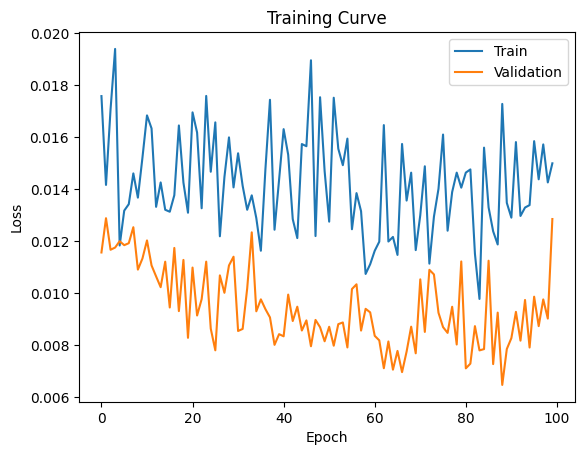

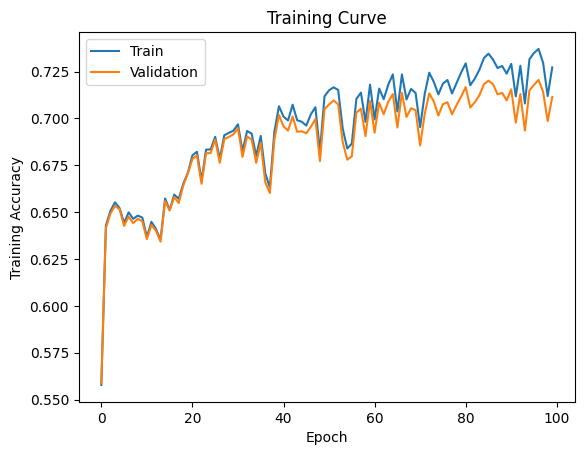

Final Training Accuracy: 0.7271991829222664
Final Validation Accuracy: 0.7114531379383389


In [ ]:
model = RNN(50, 128, 3, 'RNN', vectors)
train(model, train_loaders, val_loaders, batch_size = batch_size, num_epochs = 100, learning_rate = 0.0005)

Epoch Number: 0
Epoch Number: 1
Epoch Number: 2
Epoch Number: 3
Epoch Number: 4
Epoch Number: 5
Epoch Number: 6
Epoch Number: 7
Epoch Number: 8
Epoch Number: 9
Epoch Number: 10
Epoch Number: 11
Epoch Number: 12
Epoch Number: 13
Epoch Number: 14
Epoch Number: 15
Epoch Number: 16
Epoch Number: 17
Epoch Number: 18
Epoch Number: 19
Epoch Number: 20
Epoch Number: 21
Epoch Number: 22
Epoch Number: 23
Epoch Number: 24
Epoch Number: 25
Epoch Number: 26
Epoch Number: 27
Epoch Number: 28
Epoch Number: 29
Epoch Number: 30
Epoch Number: 31
Epoch Number: 32
Epoch Number: 33
Epoch Number: 34
Epoch Number: 35
Epoch Number: 36
Epoch Number: 37
Epoch Number: 38
Epoch Number: 39
Epoch Number: 40
Epoch Number: 41
Epoch Number: 42
Epoch Number: 43
Epoch Number: 44
Epoch Number: 45
Epoch Number: 46
Epoch Number: 47
Epoch Number: 48
Epoch Number: 49


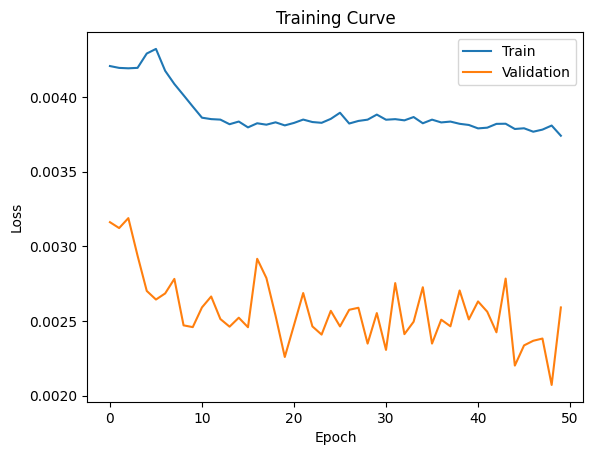

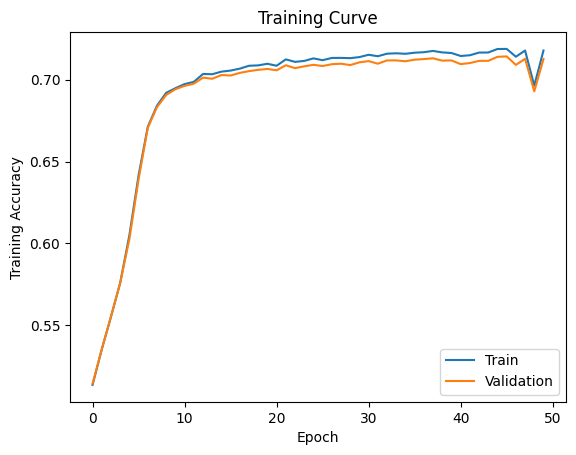

Final Training Accuracy: 0.7178250361516447
Final Validation Accuracy: 0.7126981070307535


In [ ]:
model2 = RNN(300, 128, 3, 'RNN', vectors)
train(model2, train_loaders, val_loaders, batch_size = batch_size, num_epochs = 50, learning_rate = 0.0005)

In [ ]:
##### Deep LSTM #####
deep_lstm = Deep_LSTM(input_size = 50, hidden_size = 256, num_class = 3, num_layers = 2, name = 'Deep_LSTM', vectors = vectors)
train(deep_lstm, train_loaders, val_loaders, batch_size = batch_size, num_epochs = 100, learning_rate = 0.01)

Epoch Number: 0
Epoch Number: 1
Epoch Number: 2
Epoch Number: 3
Epoch Number: 4
Epoch Number: 5
Epoch Number: 6
Epoch Number: 7
Epoch Number: 8
Epoch Number: 9
Epoch Number: 10
Epoch Number: 11
Epoch Number: 12
Epoch Number: 13


Epoch Number: 0
Epoch Number: 1
Epoch Number: 2
Epoch Number: 3
Epoch Number: 4
Epoch Number: 5
Epoch Number: 6
Epoch Number: 7
Epoch Number: 8
Epoch Number: 9
Epoch Number: 10
Epoch Number: 11
Epoch Number: 12
Epoch Number: 13
Epoch Number: 14
Epoch Number: 15
Epoch Number: 16
Epoch Number: 17
Epoch Number: 18
Epoch Number: 19
Epoch Number: 20
Epoch Number: 21
Epoch Number: 22
Epoch Number: 23
Epoch Number: 24
Epoch Number: 25
Epoch Number: 26
Epoch Number: 27
Epoch Number: 28
Epoch Number: 29
Epoch Number: 30
Epoch Number: 31
Epoch Number: 32
Epoch Number: 33
Epoch Number: 34
Epoch Number: 35
Epoch Number: 36
Epoch Number: 37
Epoch Number: 38
Epoch Number: 39
Epoch Number: 40
Epoch Number: 41
Epoch Number: 42
Epoch Number: 43
Epoch Number: 44
Epoch Number: 45
Epoch Number: 46
Epoch Number: 47
Epoch Number: 48
Epoch Number: 49
Epoch Number: 50
Epoch Number: 51
Epoch Number: 52
Epoch Number: 53
Epoch Number: 54
Epoch Number: 55
Epoch Number: 56
Epoch Number: 57
Epoch Number: 58
Epoch N

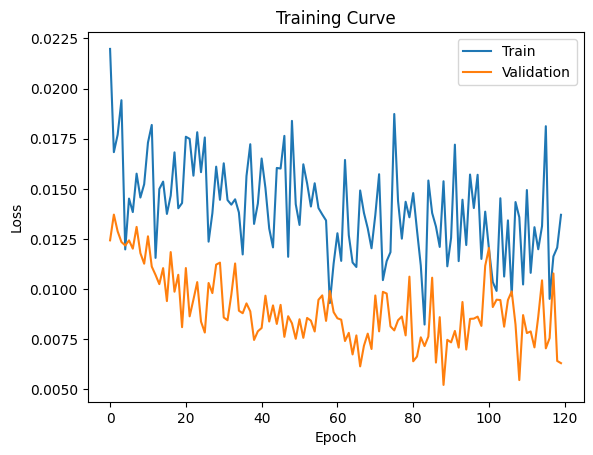

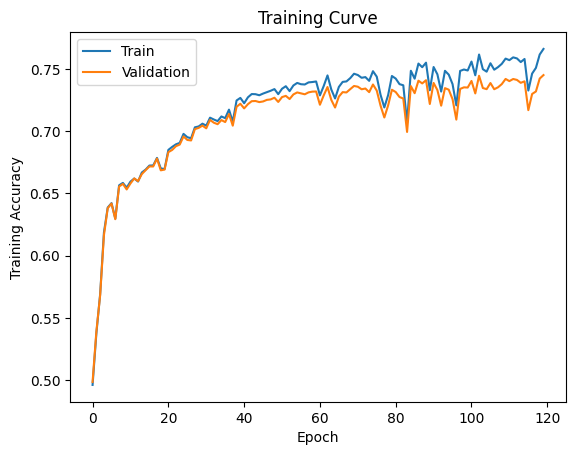

Final Training Accuracy: 0.7659800382246762
Final Validation Accuracy: 0.7449700552677695


In [ ]:
##### Deep LSTM #####
deep_lstm2 = Deep_LSTM(input_size = 50, hidden_size = 64, num_class = 3, num_layers = 2, name = 'Deep_LSTM', vectors = vectors)
train(deep_lstm2, train_loaders, val_loaders, batch_size = batch_size, num_epochs = 120, learning_rate = 0.001)

In [ ]:
deep_lstm = Deep_LSTM(input_size = 50, hidden_size = 64, num_class = 3, num_layers = 3, name = 'Deep_LSTM', vectors = vectors)
train(deep_lstm, train_loaders, val_loaders, batch_size = batch_size, num_epochs = 120, learning_rate = 0.001)

Epoch Number: 0
Epoch Number: 1
Epoch Number: 2
Epoch Number: 3
Epoch Number: 4
Epoch Number: 5
Epoch Number: 6
Epoch Number: 7
Epoch Number: 8
Epoch Number: 9
Epoch Number: 10
Epoch Number: 11
Epoch Number: 12
Epoch Number: 13
Epoch Number: 14
Epoch Number: 15
Epoch Number: 16
Epoch Number: 17
Epoch Number: 18
Epoch Number: 19
Epoch Number: 20
Epoch Number: 21
Epoch Number: 22
Epoch Number: 23
Epoch Number: 24
Epoch Number: 25
Epoch Number: 26
Epoch Number: 27
Epoch Number: 28
Epoch Number: 29
Epoch Number: 30
Epoch Number: 31
Epoch Number: 32
Epoch Number: 33
Epoch Number: 34
Epoch Number: 35
Epoch Number: 36
Epoch Number: 37
Epoch Number: 38
Epoch Number: 39
Epoch Number: 40
Epoch Number: 41
Epoch Number: 42
Epoch Number: 43
Epoch Number: 44
Epoch Number: 45
Epoch Number: 46
Epoch Number: 47
Epoch Number: 48
Epoch Number: 49
Epoch Number: 50
Epoch Number: 51
Epoch Number: 52
Epoch Number: 53
Epoch Number: 54
Epoch Number: 55
Epoch Number: 56
Epoch Number: 57
Epoch Number: 58
Epoch N

## Baseline Model:

**Support Vector Machine (SVM):** (`Pandas` library)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

def train_svm_model(train_data, train_label, val_data, val_label, num_epochs, dataset):
  #create an SVM model
  svm_model = svm.SVC(kernel = 'linear', C = 0.001)

  # decide whether the dataset is train/val
  if(dataset == 'val'):
    train_data = val_data
    train_label = val_label

  # Lists to store training curve data
  epochs = []
  train_accuracy = []

  # Train the model and track the training curve
  for epoch in range(num_epochs):
    #train the bsaeline model (x_train, y_train)
    svm_model.fit(train_data, train_label)

    # Make predictions on the training data
    train_predictions = svm_model.predict(train_data)

    # Calculate accuracy on the training data
    train_acc = accuracy_score(train_label, train_predictions)

    # Append epoch number and accuracy to the lists
    epochs.append(epoch + 1)
    train_accuracy.append(train_acc)

    # Print training progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_acc:.4f}")

  # Plot the training curve
  plt.plot(epochs, train_accuracy)
  plt.title('Validation Curve')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()

  return svm_model

In [ ]:
train_embedding_list = []
val_embedding_list = []
train_label_list = []
val_label_list = []

for group in train_data:  # list of tensors
  for tensor in group:  # each tensor within the group
    zero_tensor = torch.zeros(1, 50)
    for i in range(len(tensor)):  # iterate through each page number
      word_embedding = vectors[tensor[i]]  # get corresponding word embedding
      zero_tensor += word_embedding  # get the combined word embedding
    zero_tensor = zero_tensor / len(tensor)
    train_embedding_list.append(zero_tensor)
print(len(train_embedding_list))

for group in val_data:  # list of tensors
  for tensor in group:  # each tensor within the group
    zero_tensor = torch.zeros(1, 50)
    for i in range(len(tensor)):  # iterate through each page number
      word_embedding = vectors[tensor[i]]  # get corresponding word embedding
      zero_tensor += word_embedding  # get the combined word embedding
    zero_tensor = zero_tensor / len(tensor)
    val_embedding_list.append(zero_tensor)
print(len(val_embedding_list))

for group in train_label:  # iterate through every group of label
  for label in group:  # iterate every label
    train_label_list.append(label)
print(len(train_label_list))

for group in val_label:  # iterate through every group of label
  for label in group:  # iterate every label
    val_label_list.append(label)
print(len(val_label_list))

train_label_array = np.vstack(train_label_list)
val_label_array = np.vstack(val_label_list)
print(len(train_label_array))

train_embedding_array = np.vstack(train_embedding_list)
val_embedding_array = np.vstack(val_embedding_list)
print(len(train_embedding_array))

98889
1038580
98889
1038580


In [ ]:
svm_model = train_svm_model(train_embedding_array, train_label_array, val_embedding_array, val_label_array, num_epochs = 20, dataset='train')

In [ ]:
svm_model = train_svm_model(train_embedding_array, train_label_array, val_embedding_array, val_label_array, num_epochs = 20, dataset='val')

## Final Testing:

Test with Baseline model (SVM):

In [ ]:
a=get_accuracy(svm_model,test_loader)
print(a)

Test with Deep learning model and get accuracy:

In [ ]:
b=get_accuracy(model,test_loaders)
print(b)

0.45025708178474455


In [ ]:
deep_lstm_path=get_model_name("Deep_LSTM", batch_size=256, learning_rate=0.01, epoch=99)
loaded_model = torch.load(deep_lstm_path)
c=get_accuracy(loaded_model,test_loaders)
print(c)

FileNotFoundError: ignored

In [ ]:
d=get_accuracy(deep_lstm2,test_loaders)
print(d)

In [ ]:
import torch
import torch.nn as nn

# Load the trained model
loaded_model = model  # Load your trained model here

# Define the loss function (use the same one you used during training)
loss_function = nn.MSELoss()  # Example loss function (change as needed)

# Load the testing dataloader
testing_dataloader = test_loaders  # Load your testing dataloader here

total_loss = 0.0
num_batches = 0

# Set the model to evaluation mode
loaded_model.eval()

# Iterate through the testing dataloader
with torch.no_grad():
    for inputs, targets in testing_dataloader:
        # Forward pass to get predictions
        predictions = loaded_model(inputs)

        # Calculate the batch loss
        batch_loss = loss_function(predictions, targets)

        total_loss += batch_loss.item()
        num_batches += 1

# Calculate the average test loss
average_test_loss = total_loss / num_batches

print(f"Average Test Loss: {average_test_loss}")

## Promote user input:
### Define functions

data cleaning for one-line statement

In [ ]:
# Combine convertion for one line statement
def convert(msg):
  # put into a dataframe
  df_sentence = pd.DataFrame([msg], columns=["sentence"])

  # Tokenize
  df_sentence['sentence'] = df_sentence['sentence'].astype(str)  # Convert 'sentence' column to string
  df_sentence['tokenized_sentences'] = df_sentence['sentence'].apply(lambda x: word_tokenize(x))  # New column 'tokenized_sentences' containing tokenized sentences
  subdf_sentence = df_sentence[["tokenized_sentences"]]  # extract the labels and tokenized sentences into a new dataframe, subdf

  # Remove punctuations
  subdf_sentence['perfect_tokens'] = subdf_sentence['tokenized_sentences'].apply(lambda tokens: [remove_punctuation(token) for token in tokens])

  # Remove empty strings from the tokenized sentences
  subdf_sentence['perfect_tokens'] = subdf_sentence['perfect_tokens'].apply(lambda tokens: [token for token in tokens if token])

  # convert to lowercase
  subdf_sentence['perfect_tokens'] = subdf_sentence['perfect_tokens'].apply(lambda tokens: [token.lower() for token in tokens])

  return subdf_sentence

Further step; predict the sentiment

To modify the model_path and model to use different neural networks

In [ ]:
def process_step(dataframe):
   print("Processing the next step...")

   # match the keys
   model_path = get_model_name("Deep_LSTM", batch_size = 256, learning_rate = 0.01, epoch = 99)
   state = torch.load(model_path)
   deep_lstm.load_state_dict(state)

   # create the list
   tokens_ = []
   tokens = []

   # Extract the first row from the DataFrame as a list of tokens
   first_row_tokens = dataframe['perfect_tokens'].iloc[0]

   cnt = 0
   # Append each token from the first row to the result_list one by one from the start
   for token in first_row_tokens:
      tokens_.append(token)
      cnt += 1

   # pair the tokens with the vocab list and return the number
   for idx in range(cnt):
    tokens.append(vocab[tokens_[idx]])

   # convert into tensor
   tokens_tensor = torch.LongTensor([tokens])  # create a tensor
   with torch.no_grad():  # since not training, we ensure there is no gradient computed
       pred = deep_lstm(tokens_tensor)  # contains the output of the model

   # calc the prediction
   sentiment = torch.argmax(pred)  # applying the softmax function along the tensor's dimension 1
   if(sentiment.item() == 1):
    result = "Positive"
   elif(sentiment.item() == 2):
    result = "Negative"
   else:
    result = "Neutral"
   print("the sentiment predicted for this message is: ", result)

To let user choose whether it want to continue or not

In [ ]:
# Choose to proceed
def choose(dataframe):
  user_choice = input("Do you want to proceed? (Yes/No): ").lower()

  if user_choice == 'yes':
    print("You chose 'Yes'.")
    process_step(dataframe)  # Call the function for the next step
  elif user_choice == 'no':
    print("You chose 'No'. Exiting.")
  else:
    print("Invalid choice. Please enter 'Yes' or 'No'.")
    choose(dataframe)  # promote again

### Main function

In [ ]:
user_input=""
while user_input != "No":
  # get the user input
  user_input = input("Enter a string-type sentence: ")

  # convert to suitable type store back into a dataframe
  dataframe = convert(user_input)

  #print(dataframe)  # testing
  print("Your entered sentence is: ", user_input)

  # choose to proceed or not
  choose(dataframe)

  user_input = input("Do you want to Stop? (Yes/No): ")

Enter a string-type sentence: This course is boring
Your entered sentence is:  This course is boring
Do you want to proceed? (Yes/No): Yes
You chose 'Yes'.
Processing the next step...
the sentiment predicted for this message is:  Negative
Do you want to Stop? (Yes/No): This course is fantastic


KeyboardInterrupt: ignored